In [4]:

!pip uninstall -y gym stable-baselines3
!pip install "gymnasium==0.29.1" "stable-baselines3[extra]==2.1.0" matplotlib --quiet

Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


🔁 Training for 5000 timesteps...
✅ Mean Reward: 0.00 ± 0.00

🔁 Training for 10000 timesteps...
✅ Mean Reward: 1.00 ± 0.00

🔁 Training for 20000 timesteps...
✅ Mean Reward: 0.00 ± 0.00

🔁 Training for 50000 timesteps...
✅ Mean Reward: 1.00 ± 0.00

🔁 Training for 100000 timesteps...
✅ Mean Reward: 1.00 ± 0.00

🔁 Training for 200000 timesteps...
✅ Mean Reward: 1.00 ± 0.00


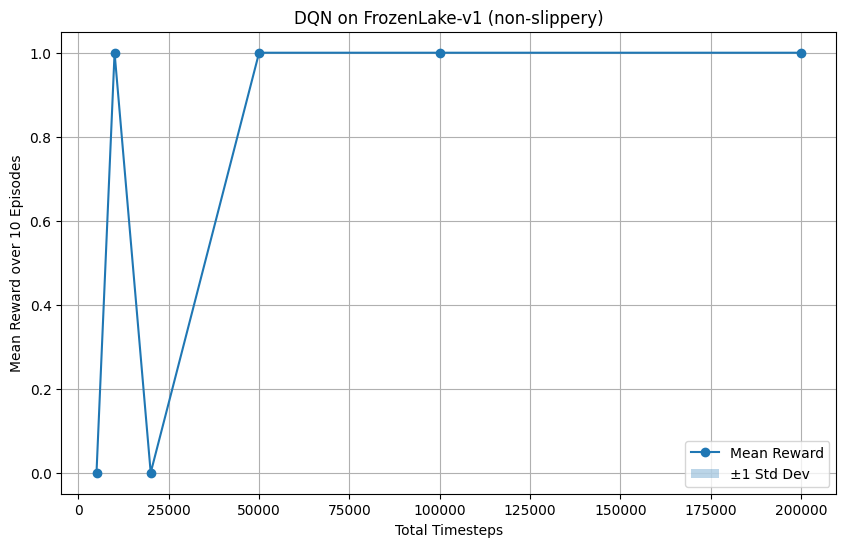


🏆 Best model at 10000 timesteps with mean reward 1.00
💾 Model saved as dqn_frozenlake_best_10000.zip


In [6]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env
import os

# Create environment (non-slippery, flattened)
env_id = "FrozenLake-v1"
env = gym.make(env_id, is_slippery=False)

# Wrap into vector env for SB3 and auto observation formatting
vec_env = make_vec_env(lambda: gym.make(env_id, is_slippery=False), n_envs=1)

# Adjust exploration hyperparams
dqn_kwargs = {
    "exploration_initial_eps": 1.0,
    "exploration_final_eps": 0.1,
    "learning_rate": 1e-3,
    "buffer_size": 10000,
    "learning_starts": 1000,
    "train_freq": 4,
    "target_update_interval": 500
}

timesteps_list = [5000, 10000, 20000, 50000, 100000, 200000]
mean_rewards = []
std_rewards = []
models = []

for steps in timesteps_list:
    print(f"\n🔁 Training for {steps} timesteps...")
    model = DQN("MlpPolicy", vec_env, verbose=0, **dqn_kwargs)
    model.learn(total_timesteps=steps)

    # Evaluate on regular (non-vectorized) env
    eval_env = gym.make(env_id, is_slippery=False)
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10)
    print(f"✅ Mean Reward: {mean_reward:.2f} ± {std_reward:.2f}")

    mean_rewards.append(mean_reward)
    std_rewards.append(std_reward)
    models.append(model)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(timesteps_list, mean_rewards, marker='o', label='Mean Reward')
plt.fill_between(timesteps_list,
                 np.array(mean_rewards) - np.array(std_rewards),
                 np.array(mean_rewards) + np.array(std_rewards),
                 alpha=0.3, label='±1 Std Dev')
plt.xlabel("Total Timesteps")
plt.ylabel("Mean Reward over 10 Episodes")
plt.title("DQN on FrozenLake-v1 (non-slippery)")
plt.grid(True)
plt.legend()
plt.show()

# Save best model
best_idx = np.argmax(mean_rewards)
best_model = models[best_idx]
best_steps = timesteps_list[best_idx]
save_path = f"dqn_frozenlake_best_{best_steps}.zip"
best_model.save(save_path)

print(f"\n🏆 Best model at {best_steps} timesteps with mean reward {mean_rewards[best_idx]:.2f}")
print(f"💾 Model saved as {save_path}")


In [7]:
!pip install gymnasium[other] moviepy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.7 MB/s eta 0:00:00


In [11]:
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from IPython.display import HTML
from moviepy.editor import ImageSequenceClip
import numpy as np

# Load the trained model
model = DQN.load("dqn_frozenlake_best_10000.zip")

# Create the environment with rendering
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

obs, _ = env.reset()
done = False
frames = []

while not done:
    frames.append(env.render())
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(int(action))  # 🔧 fix is here
    done = terminated or truncated

env.close()

# Create and display animation
clip = ImageSequenceClip(frames, fps=2).resize(height=320)
clip.ipython_display()


Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
